# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [93]:
#Import tools and data
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import plotly
import plotly.plotly as py
from plotly import figure_factory as ff
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='justin107d', api_key='')


df = pd.read_csv('data/human_body_temperature.csv')
normal_dist= np.random.normal(np.mean(df.temperature), np.std(df.temperature), size=10000

print(df.temperature.head())

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64


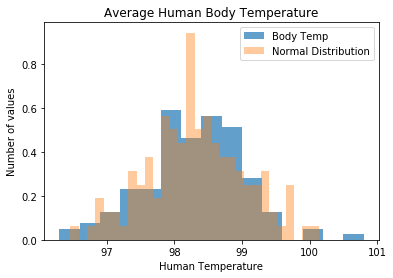

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~justin107d/0 or inside your plot.ly account where it is named 'ks-table'


In [111]:
#plot histogram of values.
plt.hist(df['temperature'], bins=15, normed=True, alpha=.7)
plt.title('Average Human Body Temperature')
plt.xlabel('Human Temperature')
plt.ylabel('Number of values')

#plot normal overlay
plt.hist(normal_dist,bins=30, alpha=.4, normed=True)
plt.legend(['Body Temp','Normal Distribution'])
plt.show()

#plot ecdf's of both
def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y



#Test for a normal distribution using the Kolmogorov-Smirnov test.  
ks_results = scipy.stats.kstest(df['temperature'], cdf='norm')

matrix_ks = [
    ['', 'Sample Size', 'Test Statistic', 'p-value'],
    ['Temperature', len(df['temperature']) - 1, ks_results[0], ks_results[1]]
]
isitnorm=pd.DataFrame(matrix_ks)

#show table with k-s test values
ks_table = ff.create_table(matrix_ks, index=True)
py.iplot(ks_table, filename='ks-table')



1.)  To check for normality, I used the Kolmogorov-Smirnov test and layed a normal distribution over in red.  Since the values outputted from the test show that the test statistic is 1 and p-value is 0, it is safe to assume that human body temperatures are normally distributed.

2.)  The text book number used determine if a sample size is sufficently large enough to use the Central Limit Theorem is 30 and this data set has 130 samples.  More samples may be preferable depending on if we intend to apply the data for something else, but for this exercise we will say it is large enough.
We cannot definitively say that body temperature is completely independent, since we have little information about the actual data itself.  Dependence may come in the form of genetics, age of the group measured, temperature of the lab where the testing was done, local epidemics, time of day, etc.  We will assume for simplicity that the scientist followed standard practices and did their best to control for other effects on the data.

t-statistic:  -5.47592520208
p-value:  0.0
z-statistic:  -5.47592520208
p-value:  0.0


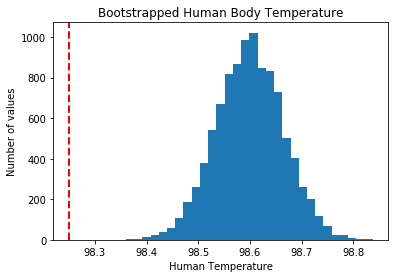

mean of data set:  98.24923076923078
minimum bootstrap sample:  98.36


In [137]:
def t_stat(data, mu=98.6):
    return (np.mean(data) - mu) / (np.std(data) / np.sqrt(len(data)))

def z_stat(data, mu=98.6, sigma=np.std(df.temperature)):
    return (np.mean(data) - mu) / (sigma / np.sqrt(len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates=np.empty(size)
    for i in range(size):
        bs_replicates[i]=func(np.random.choice(data,size=len(data)))
        
    return bs_replicates


#t-statistic testing
translated_mean= df.temperature - np.mean(df.temperature) + 98.6
bs_ts=draw_bs_reps(translated_mean,t_stat,10000)
p_t = np.sum(bs_ts <= t_stat(df.temperature)) / 10000
t_num=t_stat(df.temperature, 98.6)
print('t-statistic: ',t_num)
print('p-value: ',p_t)

#z-statistic testing
bs_zs=draw_bs_reps(translated_mean,z_stat,10000)
p_z = np.sum(bs_zs <= z_stat(df.temperature)) / 10000
z_num=z_stat(df.temperature)
print('z-statistic: ',z_num)
print('p-value: ',p_z)

#plot bootstrap samples
bs_mean=draw_bs_reps(translated_mean, np.mean, 10000)
plt.hist(bs_mean, bins=30)
plt.title('Bootstrapped Human Body Temperature')
plt.xlabel('Human Temperature')
plt.ylabel('Number of values')
plt.axvline(np.mean(df.temperature), color='r', linestyle='dashed', linewidth=2)
plt.show()
print('mean of data set: ',np.mean(df.temperature))
print('minimum bootstrap sample: ',bs_mean.min())


3.)  The one sample test was used because only one set of data was given. A t-statistic is more appropiate here since we are not given the standard deviation of the population, therefore the t and z statistics are identical.  The p-value for this test came back at 0 which means that the hypothesis that 98.6 was the true mean body temperature is highly unlikely.  In the 10,000 trials run, not one of them reached the mean from the experiment.  The minimum value from the bootstrap was 98.36.  Graphically you can see how far the mean from the dataset labelled by the red dashed line differed from the bootstrap. 

In [132]:
#take sample and translate
sample=np.random.choice(df.temperature, size=10)
translate_sample=sample-np.mean(sample)+98.6

#t-testing
bs_t_small=draw_bs_reps(sample,t_stat,size=10000)
t_num_small=t_stat(sample)
p_t_small = np.sum(np.abs(bs_t_small) >= np.abs(t_stat(sample))) / len(bs_t_small)
print('t-statistic for small sample: ',t_num_small)
print('p-value: ',p_t_small)
print('')

#z-testing
bs_z_small=draw_bs_reps(sample,z_stat,size=10000)
z_num_small=z_stat(sample)
p_z_small= np.sum(np.abs(bs_z_small) >= np.abs(z_stat(sample))) / len(bs_z_small)
print('z-statistic for small sample: ',z_num_small)
print('p-value: ',p_z_small)

t-statistic for small sample:  -1.22570282607
p-value:  0.5446

z-statistic for small sample:  -1.38552484889
p-value:  0.4907


4.)  The t and z statistics in this exercise are both different from each other and from the bootstrapping computed in 3.).  When reducing the sample size from the original data set, results have the ability to vary widely as there is a higher chance that the sample will not be representitive of the overall set.

In [136]:
#finding errors
#abnormal is considered outside of the 25th and 75th percentile range.  z=.675
stand_err=np.std(df.temperature)/np.sqrt(len(df.temperature))
margin_err = .675 * stand_err
print('margin of error: ', margin_err)

# 50% Confidence Interval on the mean 
confidence_i = np.percentile(df['temperature'], [25, 75])
print('50% of the data fall between: ', confidence_i[0], ' - ', confidence_i[1])



margin of error:  0.0432382149193
50% of the data fall between:  97.8  -  98.7


5.)  A little research showed that some in the medical community consider something abnormal if it falls outside of the 25th to 75th percentile range.  Using this standard, the upperbound to be considered normal is 98.7 and the lower bound is 97.8.

In [141]:
# Separate observations by gender
females = df[df['gender'] == 'F']
males = df[df['gender'] == 'M']

# find difference in means
diff_means = np.mean(females['temperature'])-np.mean(males['temperature'])

# Draw permutation replicates
perm_replicates = np.empty(10000)
for i in range(len(perm_replicates)): 
    both = np.concatenate((females['temperature'], males['temperature']))
    both_perm = np.random.permutation(both)
    perm_females = both_perm[:len(females)]
    perm_males = both_perm[len(females):]
    perm_replicates[i] = np.mean(perm_females)-np.mean(perm_males)

# Compute the p-value
p_both = np.sum(abs(perm_replicates) >= abs(diff_means)) / len(perm_replicates)
print('observed difference:',diff_means )
print('p-value:',p_both)

observed difference: 0.289230769230727
p-value: 0.0239


6.)  Since the p-value is below the common threshold of 0.05, we can reject the null hypothesis and state that there is a significant difference in body temperature between males and females.